# Multiple Linear Regression - Regression Trees - Regression Forests & GradientBoosting Regression 

## Import `python` Packages

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

# handy helper for displaying stuff
from IPython.display import Image

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

An additional `python` package for `cool` figures!

https://anaconda.org/DistrictDataLabs/yellowbrick

* install in anaconda as follows:

`conda install -c districtdatalabs yellowbrick`

* or install via Anaconda from the Environments tab (as shown in lecture)

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

In [3]:
from yellowbrick.regressor import ResidualsPlot

# III. Multiple Linear Regression

https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

## Load the data

`CAUTION:` if you place the file in the same folder as your running Jupyter notebook, then you can read it as:

`df = pd.read_csv('unconv_MV_v5.csv')`

In [4]:
df = pd.read_csv('myDataSets/unconv_MV_v5.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [5]:
df = pd.read_excel('myDataSets/unconv_MV_v5.xlsx')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [6]:
len(df)

200

In [7]:
df.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


## Explore the data

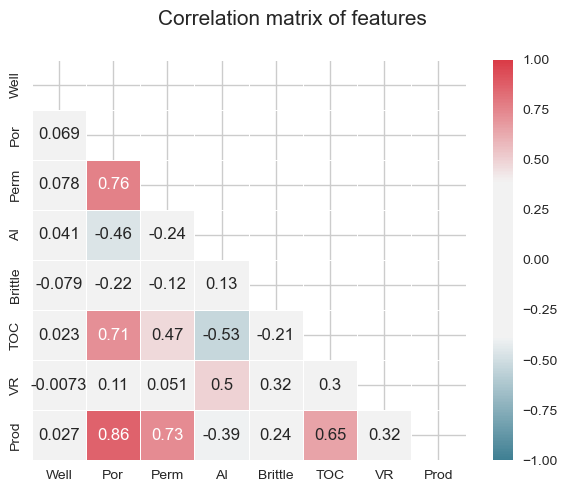

In [8]:
corrmat = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, annot=True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
fig.tight_layout()

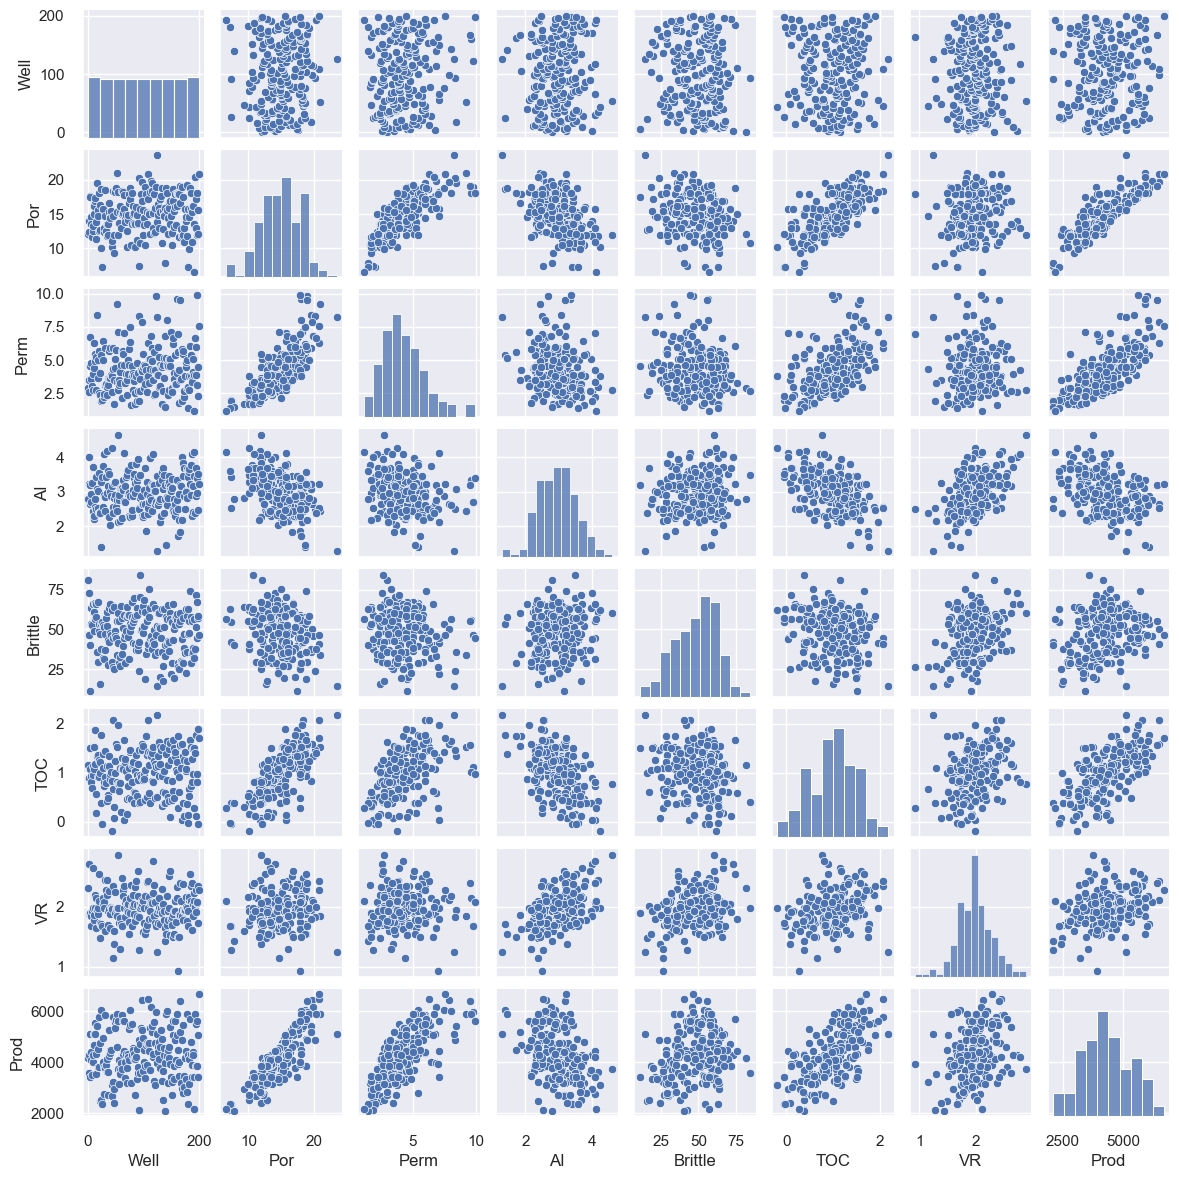

In [ ]:
sns.set()
sns.pairplot(df, height = 1.5,)
plt.show()

## A Univariate Model

$$\text{Gas Prod} = \beta_0 + \beta_1 \cdot \text{Por}$$

In [ ]:
X = df['Por'].values.reshape(-1,1)
X.shape

(200, 1)

In [11]:
X

array([[12.08],
       [12.38],
       [14.02],
       [17.67],
       [17.52],
       [14.53],
       [13.49],
       [11.58],
       [12.52],
       [13.25],
       [15.04],
       [16.19],
       [16.82],
       [17.39],
       [13.83],
       [11.34],
       [19.55],
       [15.58],
       [14.73],
       [12.47],
       [18.08],
       [16.32],
       [12.62],
       [10.03],
       [18.66],
       [ 7.27],
       [15.78],
       [15.73],
       [12.38],
       [12.89],
       [18.48],
       [14.74],
       [12.55],
       [13.58],
       [11.76],
       [11.98],
       [13.56],
       [16.55],
       [15.22],
       [14.54],
       [14.37],
       [15.4 ],
       [10.14],
       [11.09],
       [18.37],
       [14.71],
       [ 9.29],
       [11.85],
       [18.59],
       [18.18],
       [18.72],
       [20.96],
       [15.31],
       [11.98],
       [18.16],
       [13.61],
       [13.67],
       [15.21],
       [16.1 ],
       [13.  ],
       [18.32],
       [14.96],
       [

In [12]:
y = df['Prod'].values
y.shape

(200,)

In [13]:
y

array([4165.196191, 3561.146205, 4284.348574, 5098.680869, 3406.132832,
       4395.763259, 4104.400989, 3496.742701, 4025.851153, 4285.026122,
       4691.546305, 5128.20297 , 5113.940775, 5546.431951, 4323.568513,
       3539.984263, 5425.900608, 3796.037029, 4534.585915, 3803.411386,
       5778.851488, 4771.307836, 2486.075498, 2515.440716, 6046.257538,
       2351.289487, 4971.979256, 3999.613909, 2760.485982, 3825.661812,
       5859.748328, 3775.981178, 3907.28923 , 4118.233273, 3621.261108,
       2718.652945, 3608.47473 , 5249.625543, 4239.53187 , 4471.241364,
       4363.202854, 4495.004769, 3098.436639, 2677.297348, 5779.876876,
       3210.90138 , 2967.240201, 2415.825125, 5563.040771, 5337.145786,
       5670.537767, 5899.353594, 4601.071319, 3741.129167, 5605.978153,
       4079.994302, 3146.528143, 3691.832452, 3542.532883, 3969.558019,
       5851.024387, 3733.769597, 5620.911404, 4319.662079, 5620.445827,
       4431.905847, 3376.2837  , 3999.97933 , 4336.465709, 3767.

In [14]:
model = LinearRegression()
model.fit(X, y)
response = model.predict(X)

In [15]:
# look at the coefficient values for the INTERCEPT of the linear regression model:
b0 = model.intercept_
print('Intercept:', b0)

Intercept: -2.944431053714652


In [16]:
# look at the coefficient value for the SLOPE of the linear regression model:
b1 = model.coef_
print('Slope:', b1)

Slope: [287.78074285]


In [17]:
# Obtain the coefficient of determination by calling the model with the score() function:
R2 = model.score(X, y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.7428880535051593


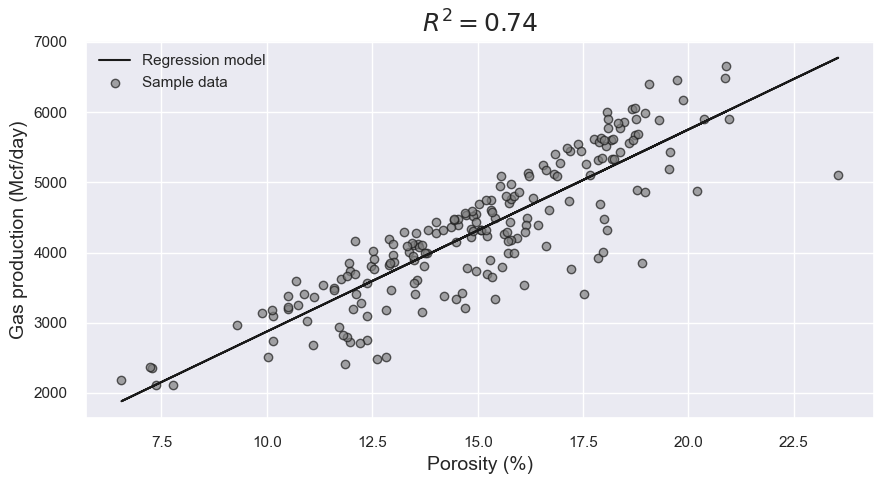

In [18]:
fig3, ax3 = plt.subplots(figsize=(9, 5))

ax3.plot(X, response, color='k', label='Regression model')
ax3.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax3.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax3.set_xlabel('Porosity (%)', fontsize=14)
ax3.legend(facecolor='white', fontsize=11)
ax3.set_title('$R^2= %.2f$' % R2, fontsize=18)

fig3.tight_layout()

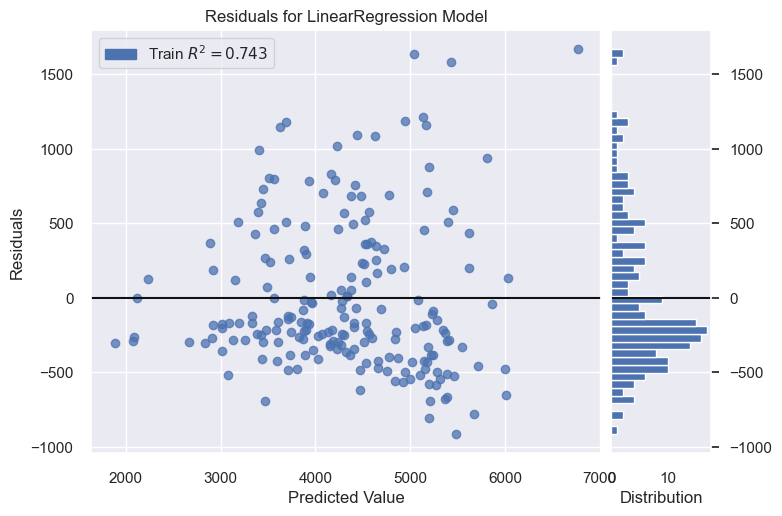

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
visualizer1a = ResidualsPlot(model, hist=True)
visualizer1a.fit(X, y)
visualizer1a.show()

* If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.
* What do you observe in the case above?
* Do you observe a fairly random, uniform distribution of the residuals against the target?
* Is your linear model performing well?
* From the histogram are the errors normally distributed around zero?

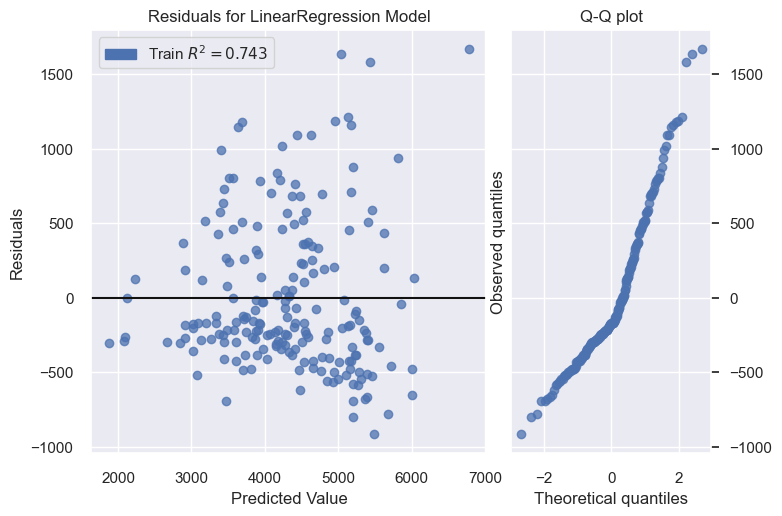

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
visualizer1b = ResidualsPlot(model, hist=False, qqplot=True)
visualizer1b.fit(X, y)
visualizer1b.show()

* If the residuals are normally distributed, then their quantiles when plotted against quantiles of normal distribution should form a straight line.
* What do you observe in our case?

## Multiple Linear Regression - A Bilinear Model

$$\text{Gas Prod} = \beta_0 + \beta_1 \cdot \text{Por} + \beta_2 \cdot \text{Brittle}$$

In [21]:
X = df[['Por', 'Brittle']].values.reshape(-1,2)
X.shape

(200, 2)

In [22]:
X[:5,:]

array([[12.08, 81.4 ],
       [12.38, 46.17],
       [14.02, 72.8 ],
       [17.67, 39.81],
       [17.52, 10.94]])

In [23]:
Y = df['Prod']
Y.shape

(200,)

In [24]:
x = X[:, 0]
y = X[:, 1]
z = Y

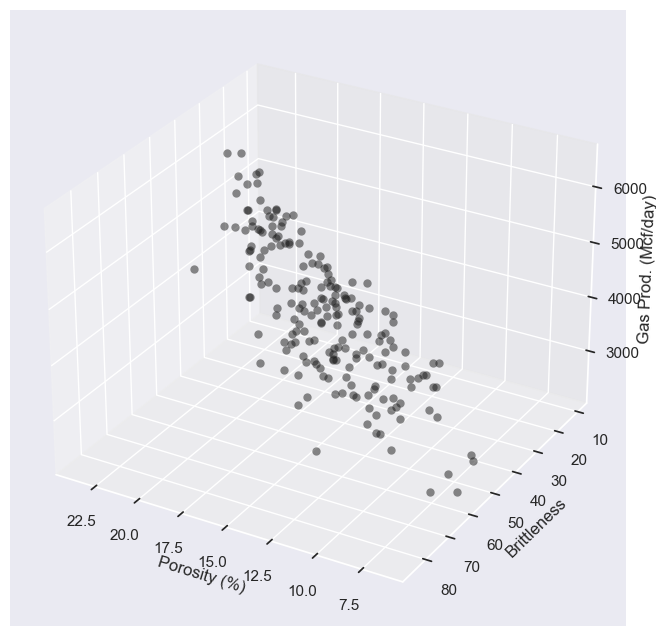

In [25]:
fig4 = plt.figure(figsize=(8, 8))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax4.set_xlabel('Porosity (%)', fontsize=12)
ax4.set_ylabel('Brittleness', fontsize=12)
ax4.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
ax4.view_init(elev=28, azim=120)

In [26]:
# create new data to predict for:
x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [27]:
# instatiate:
ols = LinearRegression()
# fit:
model = ols.fit(X, Y)
# predict:
predicted = model.predict(model_viz)

In [28]:
# get the R2 score:
r2 = model.score(X, Y)
print('Coefficient of determination:', r2)

Coefficient of determination: 0.9330601183262976


In [29]:
# get the intercept, b0:
model.intercept_

-2003.0141117390185

In [30]:
# get the "slope" coefficients, b1 and b2:
model.coef_

array([320.39400889,  31.37662237])

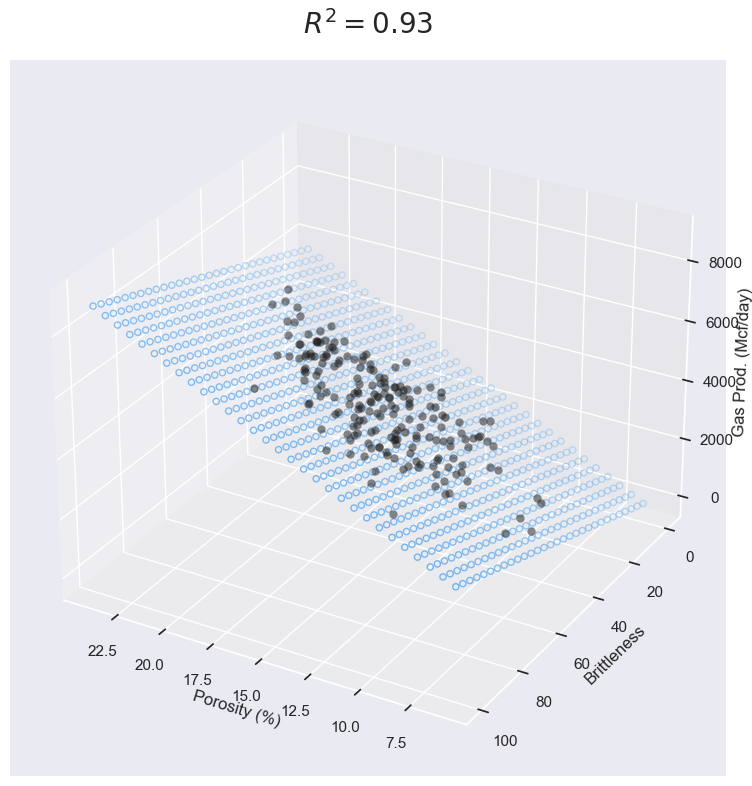

In [31]:
fig4 = plt.figure(figsize=(8, 8))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot(x, y, z, 
         color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax4.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, 
            facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax4.set_xlabel('Porosity (%)', fontsize=12)
ax4.set_xlabel('Porosity (%)', fontsize=12)
ax4.set_ylabel('Brittleness', fontsize=12)
ax4.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
ax4.view_init(elev=28, azim=120)
fig4.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
fig4.tight_layout()

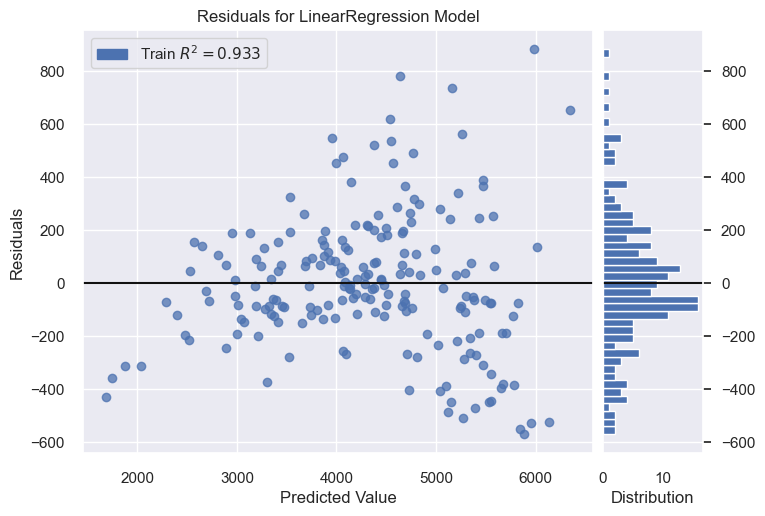

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
visualizer2 = ResidualsPlot(model, hist=True)
visualizer2.fit(X, Y)
visualizer2.show()

* If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.
* What do you observe in the case above?
* Do you observe a fairly random, uniform distribution of the residuals against the target?
* Is your linear model performing well?
* From the histogram are the errors normally distributed around zero?

## A Quadratic Model

$$\text{Gas Prod} = \beta_0 + \beta_1 \cdot \text{Por} + \beta_2 \cdot \text{Brittle} + \beta_3 \cdot \text{Por}^2 + \beta_4 \cdot \text{Por} \cdot \text{Brittle} + \beta_5 \cdot \text{Brittle}^2$$

* `CAUTION:` including interactions, so set `interactions_only=False` or the default

In [33]:
Degree = 2
pol_features = PolynomialFeatures(degree=Degree, include_bias=False)

In [34]:
X_poly = pol_features.fit_transform(X)

In [35]:
X_poly[:5,:]

array([[  12.08  ,   81.4   ,  145.9264,  983.312 , 6625.96  ],
       [  12.38  ,   46.17  ,  153.2644,  571.5846, 2131.6689],
       [  14.02  ,   72.8   ,  196.5604, 1020.656 , 5299.84  ],
       [  17.67  ,   39.81  ,  312.2289,  703.4427, 1584.8361],
       [  17.52  ,   10.94  ,  306.9504,  191.6688,  119.6836]])

In [36]:
X.shape, X_poly.shape

((200, 2), (200, 5))

In [37]:
pol_features.get_feature_names_out( ['Por', 'Brittle'] )

array(['Por', 'Brittle', 'Por^2', 'Por Brittle', 'Brittle^2'],
      dtype=object)

In [38]:
pol_features.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [39]:
ols = LinearRegression()
model = ols.fit(X_poly, Y)

In [40]:
# look at the coefficient values for the INTERCEPT of the linear regression model:
a0 = model.intercept_
print('Intercept:', a0)

Intercept: -859.8340177516284


In [41]:
# look at the coefficient value for the SLOPE of the linear regression model:
a1 = model.coef_
print('Slope:', a1)

Slope: [62.52966401 68.63202856  6.32913205  1.47801232 -0.63671786]


In [42]:
# Obtain the coefficient of determination by calling the model with the score() function:
R2 = model.score(X_poly, Y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.9699480800802062


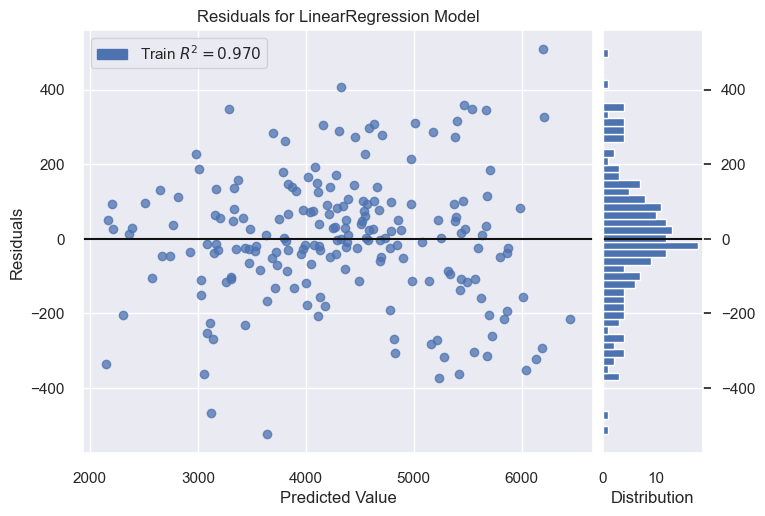

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer3 = ResidualsPlot(model, hist=True)
visualizer3.fit(X_poly, Y)
visualizer3.show()

* If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.
* What do you observe in the case above?
* Do you observe a fairly random, uniform distribution of the residuals against the target?
* Is your linear model performing well?
* From the histogram are the errors normally distributed around zero?

## A Multi-Linear Model

$$\text{Gas Prod} = \beta_0 + \beta_1 \cdot \text{Por} + \beta_2 \cdot \text{Brittle} + \beta_3 \cdot \text{Perm} + \beta_4 \cdot \text{TOC}$$

* `CAUTION:` not accounting for interactions between the features

In [44]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

In [45]:
X = df[features].values.reshape(-1, len(features))
y = df[target].values

In [46]:
X.shape, y.shape

((200, 4), (200,))

In [47]:
ols = LinearRegression()
model = ols.fit(X, y)

In [48]:
# look at the coefficient values for the INTERCEPT of the linear regression model:
a0 = model.intercept_
print('Intercept:', a0)

Intercept: -1575.273496626718


In [49]:
# look at the coefficient value for the SLOPE of the linear regression model:
a1 = model.coef_
print('Slope:', a1)

Slope: [244.60011793  31.58801063  86.87367291 325.19354135]


In [50]:
# Obtain the coefficient of determination by calling the model with the score() function:
R2 = model.score(X, y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.9516996043535946


#### Make the following future predictions:

* Por = 12 (%)
* Brittle = 81 (%)
* VR = 2.31 (%)
* AI = 2.8 (kg/m2s*10^6)

In [51]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([5029.77688021])

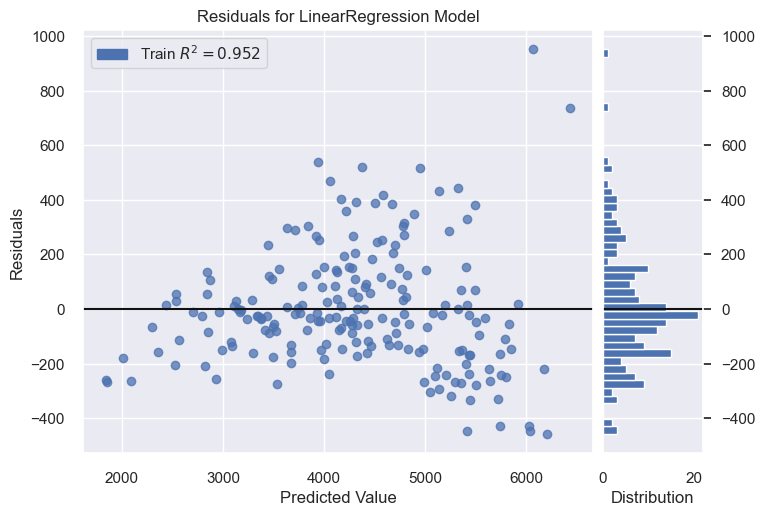

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
visualizer4 = ResidualsPlot(model, hist=True)
visualizer4.fit(X, y)
visualizer4.show()

* If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.
* What do you observe in the case above?
* Do you observe a fairly random, uniform distribution of the residuals against the target?
* Is your linear model performing well?
* From the histogram are the errors normally distributed around zero?

## Split the data into training and testing sets

In [53]:
# The data is split into training and testing sets:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# VI. Regression Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
# Initialize an instance of decision tree regression:
decision_regressor = DecisionTreeRegressor(max_depth=3)

In [57]:
# Train your model using the LinearRegression class:
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [58]:
# predict:
y_pred = decision_regressor.predict(X_test)

In [59]:
# measure the performance of the model:
mean_absolute_error(y_test, y_pred)

353.3596126612192

In [60]:
mean_squared_error(y_test, y_pred)

212582.21432959166

In [61]:
r2_score(y_test, y_pred)

0.7934259508142446

In [62]:
from sklearn.tree import plot_tree

Text(0.5, 1.0, "Decision tree trained on the features 'Por', 'Brittle', 'Perm', 'TOC'")

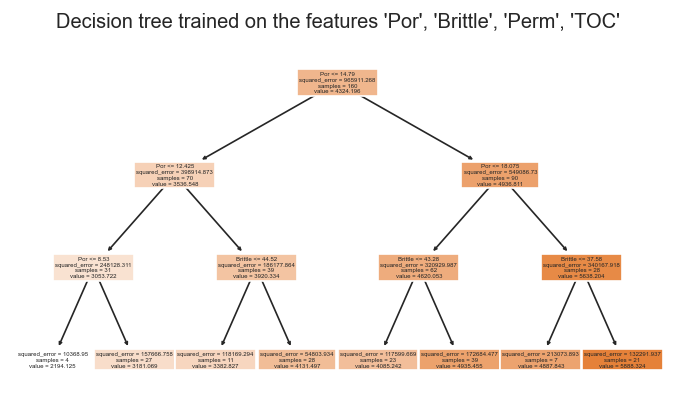

In [63]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=120)
plot_tree(decision_regressor, 
          feature_names=features, 
          class_names=target, 
          filled=True)
axes_plottree.set_title("Decision tree trained on the features 'Por', 'Brittle', 'Perm', 'TOC'")
#fig_plottree.savefig('mymodel_tree.png')

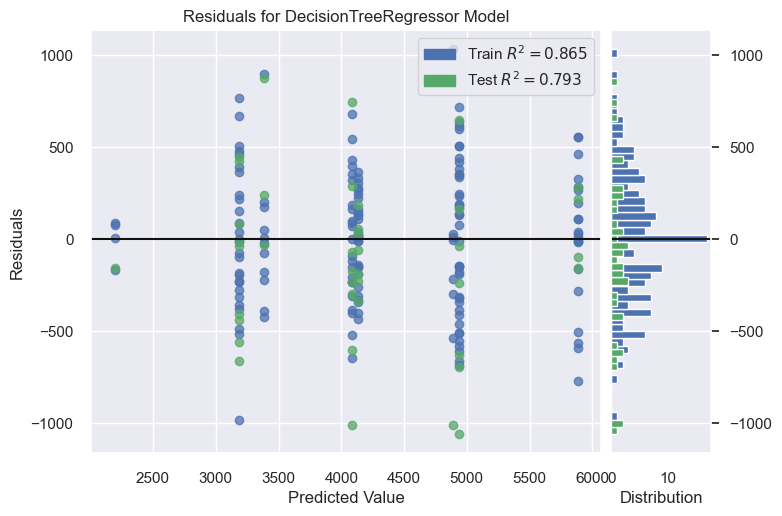

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
visualizer7 = ResidualsPlot(decision_regressor, hist=True)
visualizer7.fit(X_train, y_train)
visualizer7.score(X_test, y_test)
visualizer7.show()

* If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.
* What do you observe in the case above?
* Do you observe a fairly random, uniform distribution of the residuals against the target?
* Is your linear model performing well?
* From the histogram are the errors normally distributed around zero?

## Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Initialize an instance of the random forest regression:
randomForestModel = RandomForestRegressor(n_estimators=100,
                                          bootstrap = True,
                                          max_features = 'sqrt')

In [67]:
randomForestModel.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [68]:
rf_predictions = randomForestModel.predict(X_test)

In [69]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_predictions))

Mean Absolute Error: 176.64431596925002


In [70]:
print('Mean Squared Error:', mean_squared_error(y_test, rf_predictions))

Mean Squared Error: 48257.31457416055


In [71]:
r2_score(y_test, rf_predictions)

0.953106571469994

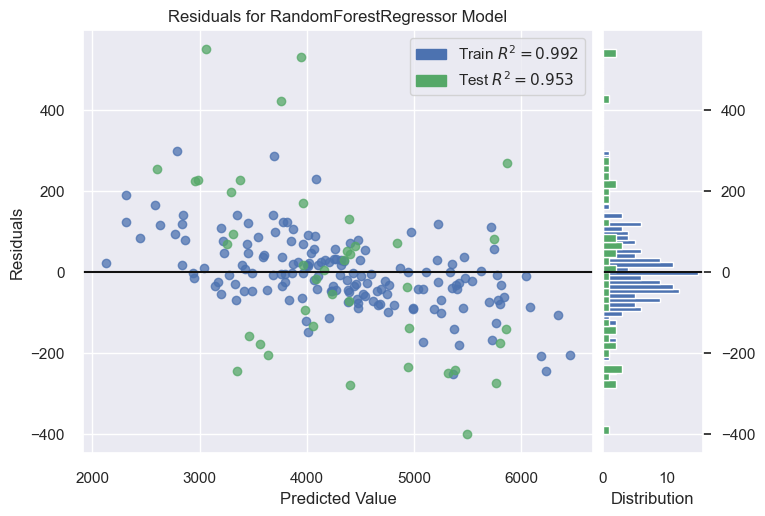

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [72]:
visualizer8 = ResidualsPlot(randomForestModel, hist=True)
visualizer8.fit(X_train, y_train)
visualizer8.score(X_test, y_test)
visualizer8.show()

In [73]:
feature_list = df.columns

In [74]:
feature_list

Index(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'], dtype='object')

In [75]:
importances = list(randomForestModel.feature_importances_)

In [76]:
feature_importances = [(feature, round(importance, 2)) for
feature, importance in zip(feature_list, importances)]

In [77]:
feature_importances = sorted(feature_importances, key = lambda
x: x[1], reverse = True)

In [78]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Well                 Importance: 0.52
Variable: Perm                 Importance: 0.19
Variable: AI                   Importance: 0.15
Variable: Por                  Importance: 0.14


[None, None, None, None]

Text(0, 0.5, 'R2 score')

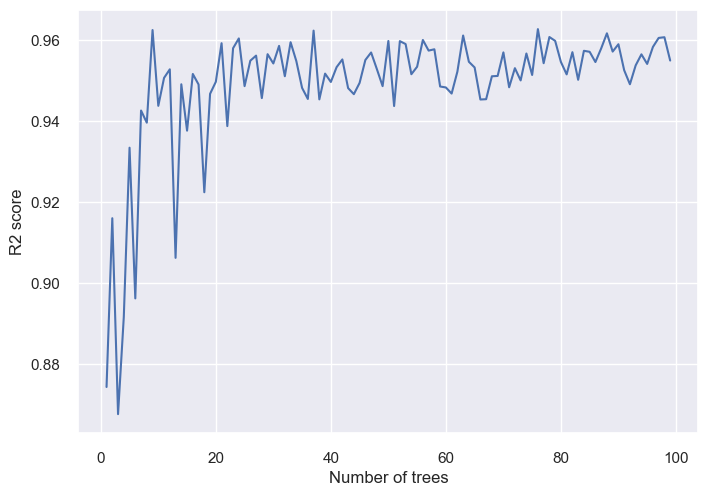

In [79]:
ntrees = np.arange(1, 100)
nt_scores = []
for nt in ntrees:
    rf = RandomForestRegressor(n_estimators=nt,
                               bootstrap = True,
                               max_features = 'sqrt')
    rf.fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    nt_scores.append(r2_score(y_test, rf_predictions))
plt.figure(10)
plt.plot(ntrees, nt_scores)
plt.xlabel('Number of trees')
plt.ylabel('R2 score')

# VII. GradientBoostingRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gbrt = GradientBoostingRegressor(max_depth=2, 
                                 n_estimators=30, 
                                 learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=30)

* `learning_rate:` how fast the model learns. Every new tree added into the model modifies the model's overall performance. The magnitude of the modification is controlled by learning rate.
* The lower the learning rate, the slower the model learns.
* A slower learning rate results into a more robust and generalizable model.
* In general, models that learn slowly perform better.
* However, slow learning is costly!
* `n_estimator:` number of trees used in the model.
* More trees are required to train the mode when the `learning_rate` is low.
* Additionally, too many trees may render the model to overfitting.
* In general, *random forests* and *gradient boosting* offer higher flexibility and performance.

In [82]:
gbrt_predictions = gbrt.predict(X_test)

In [83]:
r2_score(y_test, gbrt_predictions)

0.9389683939096094

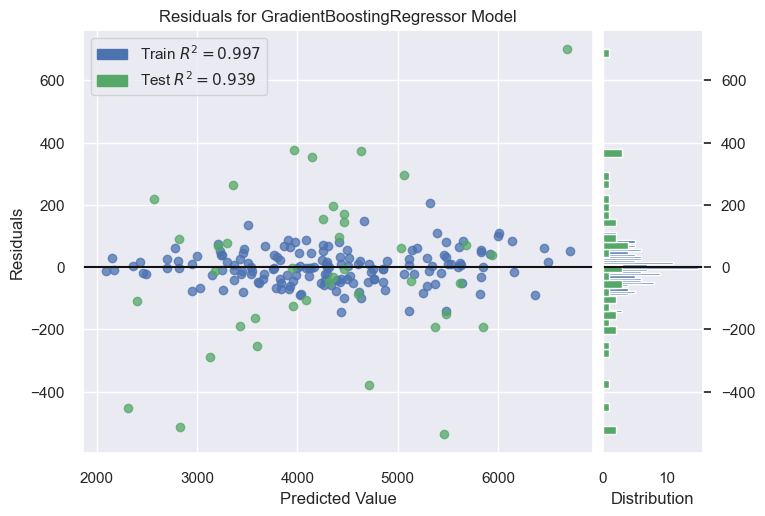

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
visualizer9 = ResidualsPlot(gbrt, hist=True)
visualizer9.fit(X_train, y_train)
visualizer9.score(X_test, y_test)
visualizer9.show()

In [85]:
learnrates = np.logspace(-3, 0, 50)

In [86]:
learnrates

array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])

Text(0, 0.5, '$R^2$ score')

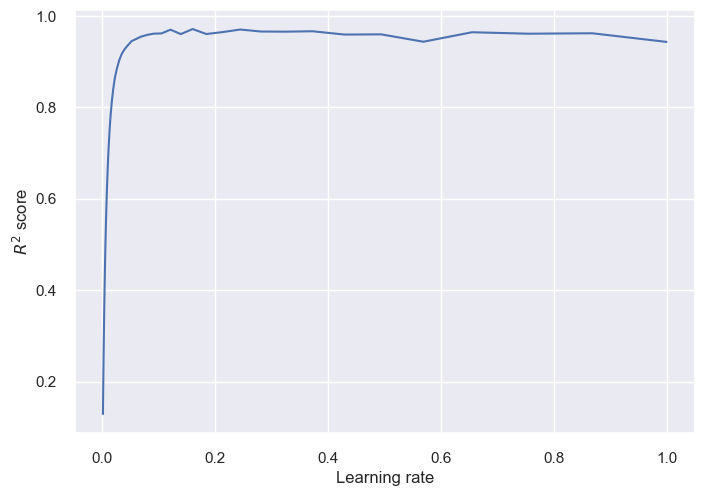

In [87]:
lr_scores = []
for lr in learnrates:
    temp_model = GradientBoostingRegressor(max_depth=2, 
                                           n_estimators=100, 
                                           learning_rate=lr)
    temp_model.fit(X_train, y_train)
    temp_predictions = temp_model.predict(X_test)
    lr_scores.append(r2_score(y_test, temp_predictions))

plt.figure(10)
plt.plot(learnrates, lr_scores)
plt.xlabel('Learning rate')
plt.ylabel(r'$R^2$ score')

In [88]:
nestimators = np.arange(1, 100)

Text(0, 0.5, '$R^2$ score')

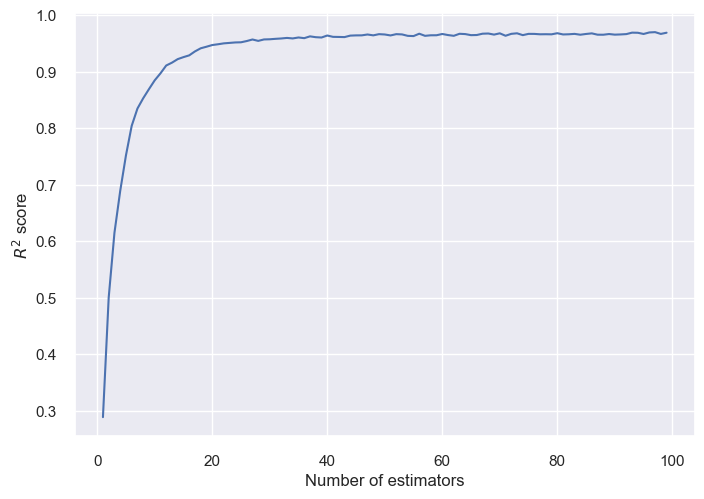

In [89]:
nest_scores = []
for nest in nestimators:
    temp_model = GradientBoostingRegressor(max_depth=2, 
                                           n_estimators=nest, 
                                           learning_rate=0.25)
    temp_model.fit(X_train, y_train)
    temp_predictions = temp_model.predict(X_test)
    nest_scores.append(r2_score(y_test, temp_predictions))

plt.figure(10)
plt.plot(nestimators, nest_scores)
plt.xlabel('Number of estimators')
plt.ylabel(r'$R^2$ score')

%%script echo skipping